# Week4授業前課題2 住宅価格を回帰分析しよう

## 【課題1】練習のために特徴量の選択
データセットを読み込んだ後、GrLivAreaとYearBuiltを抜き出してください。

In [2]:
import pandas as pd

#read csv file to get data frame
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
#extract GrLivArea, YearBuilt and SalePrice
df = df[['GrLivArea', 'YearBuilt', 'SalePrice']]
df.head()

,GrLivArea,YearBuilt,SalePrice
0,1710,2003,208500
1,1262,1976,181500
2,1786,2001,223500
3,1717,1915,140000
4,2198,2000,250000


## 【課題2】回帰問題のパイプライン
データを簡単に分析、前処理し、 線形回帰 による学習、推定、評価、可視化までの一連の流れ（パイプライン）を作成・実行してください。

sklearn.linear_model.LinearRegression — scikit-learn 0.20.2 documentation

評価のための指標値は分類問題と異なり、平均二乗誤差（Mean Squared Error, MSE）を使うことが一般的です。

sklearn.metrics.mean_squared_error — scikit-learn 0.20.2 documentation

可視化は横軸にある特徴量、縦軸に推測した住宅価格といった方法で行えます。

### 分析

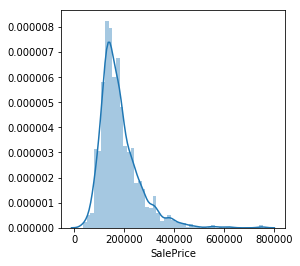

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

#Ditributionを確認
fig, axes = plt.subplots(1,1, figsize=(4,4))
sns.distplot(df['SalePrice']);

In [6]:
#Logをとって分布を左右対称に近づける
import numpy as np
df['SalePriceLog'] = np.log(df['SalePrice'])

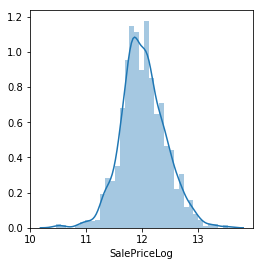

In [7]:
fig, axes = plt.subplots(1,1,figsize=(4,4))
sns.distplot(df['SalePriceLog']);

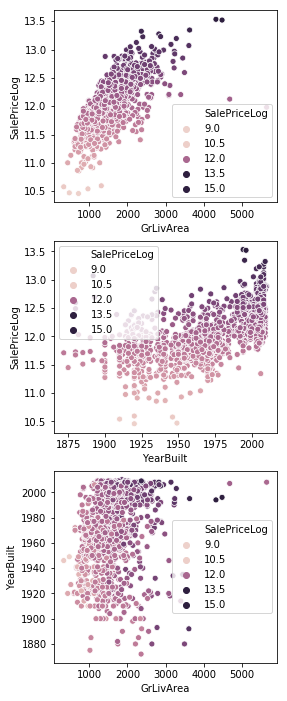

In [8]:
#Scatterplot

fig, axes = plt.subplots(3,1, figsize=(4,12))
sns.scatterplot(ax=axes[0], data=df, x=df.columns[0], y=df.columns[3], hue=df.columns[3]);
sns.scatterplot(ax=axes[1], data=df, x=df.columns[1], y=df.columns[3], hue=df.columns[3]);
sns.scatterplot(ax=axes[2], data=df, x=df.columns[0], y=df.columns[1], hue=df.columns[3]);

fig.tight_layout;

In [9]:
#SalePriceLogのMaxとminを確認
print(df['SalePriceLog'].max())
print(df['SalePriceLog'].min())

13.534473028231162
10.460242108190519


In [10]:
#サンプル数が散らばるように区間を区切る
df_cut, bins = pd.qcut(df['SalePriceLog'], 4, retbins=True)
print(df_cut[0:5])
df_cut.value_counts()

0    (12.002, 12.274]
1    (12.002, 12.274]
2    (12.274, 13.534]
3    (11.775, 12.002]
4    (12.274, 13.534]
Name: SalePriceLog, dtype: category
Categories (4, interval[float64]): [(10.459000000000001, 11.775] < (11.775, 12.002] < (12.002, 12.274] < (12.274, 13.534]]


(11.775, 12.002]                367
(12.002, 12.274]                366
(10.459000000000001, 11.775]    365
(12.274, 13.534]                362
Name: SalePriceLog, dtype: int64

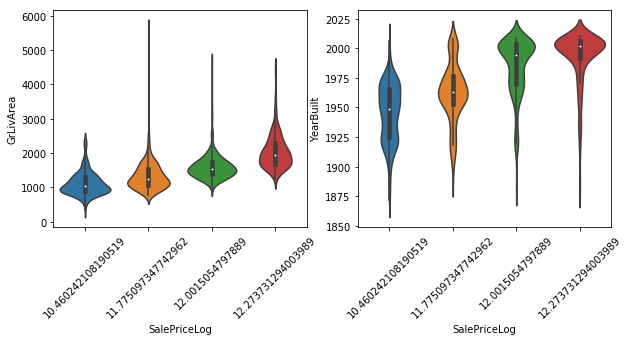

In [11]:
#Violinplot
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
ax_0 = sns.violinplot(ax=axes[0], data=df, x=df_cut, y=df.columns[0]);
ax_1 = sns.violinplot(ax=axes[1], data=df, x=df_cut, y=df.columns[1]);

ax_0.set_xticklabels(labels=bins, rotation=45)
ax_1.set_xticklabels(labels=bins, rotation=45)
fig.tight_layout;

### 前処理

In [12]:
#dfを特徴量と目的変数に分割する
import numpy as np

#dataframe to ndarray
X = np.array(df.iloc[:, [0,1]])
y = np.array(df.iloc[:, 3])

In [13]:
#分割確認
print(X[0:5])
print(y[0:5])

[[1710 2003]
 [1262 1976]
 [1786 2001]
 [1717 1915]
 [2198 2000]]
[12.24769432 12.10901093 12.31716669 11.8493977  12.4292162 ]


In [14]:
#train と testにデータを分割
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=3/4, test_size=1/4)

In [15]:
#確認
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1095, 2)
(365, 2)
(1095,)
(365,)


In [45]:
from sklearn.preprocessing import StandardScaler

#インスタンス生成
scaler = StandardScaler()
#trainデータからmeanとstdevを計算
scaler.fit(X_train)
#normarize x -> (x - x_mean)/s
X_train_z = scaler.transform(X_train)

/Users/ohmori/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/ohmori/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [46]:
#testデータもtrainデータをもとに変換
X_test_z = scaler.transform(X_test)

/Users/ohmori/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [47]:
#変換の確認
print(X_train.mean(axis=0))
print(X_train.std(axis=0))

print(X_test.mean(axis=0))
print(X_test.std(axis=0))

print(X_train_z.mean(axis=0))
print(X_train_z.std(axis=0))

print(X_test_z.mean(axis=0))
print(X_test_z.std(axis=0))

[1525.97442922 1972.13607306]
[536.9822572  30.0482219]
[1483.93150685 1968.6630137 ]
[487.22322888  30.4734131 ]
[ 1.58371540e-16 -2.17765937e-15]
[1. 1.]
[-0.07829481 -0.11558286]
[0.90733581 1.01415029]


### 学習

In [48]:
from sklearn.linear_model import LinearRegression
#インスタンス作成
reg = LinearRegression()
#train model with train data
learned_model_lnr_reg = reg.fit(X_train_z, y_train)

### 推定

In [49]:
#predict y_test with learned model
pred_lnr_reg = learned_model_lnr_reg.predict(X_test_z)

### 評価

In [50]:
#R^2
r2_lnr_reg = learned_model_lnr_reg.score(X_test_z, y_test)
print(r2_lnr_reg)

#決定係数を手計算でも確認
u = ((y_test - pred_lnr_reg)**2).sum(axis=0)
v = ((y_test - y_test.mean() )**2).sum(axis=0)
r2 = 1 - u/v

print(r2)

0.727749937143805
0.727749937143805


In [51]:
#MSE
from sklearn.metrics import mean_squared_error
mse_lnr_reg = mean_squared_error(y_test, pred_lnr_reg)
print(mse_lnr_reg)

#手計算でも確認
mse = u/(len(y_test))
print(mse)

0.040594345643194266
0.040594345643194266


### 可視化

In [52]:
import matplotlib.pyplot as plt

def plot_results(x1, x2, y_ans, y_pred):
    fig, axes  = plt.subplots(1,3, figsize=(14,4))
    axes[0].scatter(x1, y_ans)
    axes[0].scatter(x1, y_pred)

    axes[1].scatter(x2, y_ans)
    axes[1].scatter(x2, y_pred)

    axes[0].legend(['y_test', 'y_test_pred'])
    axes[1].legend(['y_test', 'y_test_pred'])
    
    axes[2].scatter(y_pred, y_ans)

    #軸名設定
    axes[0].set_xlabel(clm_names[0])
    axes[0].set_ylabel(clm_names[3])

    axes[1].set_xlabel(clm_names[1])
    axes[1].set_ylabel(clm_names[3])
    
    axes[2].set_xlabel('y_ans')
    axes[2].set_ylabel('y_pred')

    fig.tight_layout;

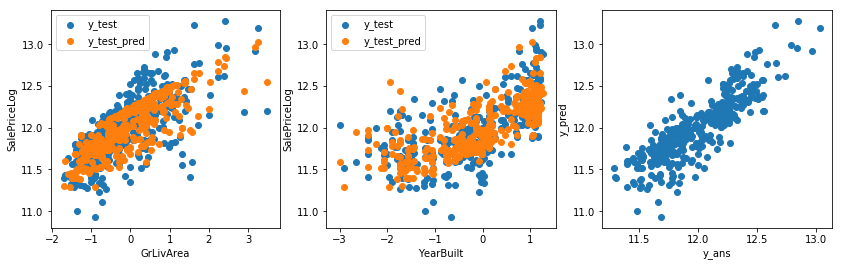

In [53]:
#2次元プロット
plot_results(X_test_z[:, 0], X_test_z[:, 1], y_test, pred_lnr_reg)

In [65]:
from mpl_toolkits.mplot3d import Axes3D

def plot_results_3d(x1, x2, y_ans, y_pred):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x1, x2, y_ans)
    ax.scatter(x1, x2, y_pred)

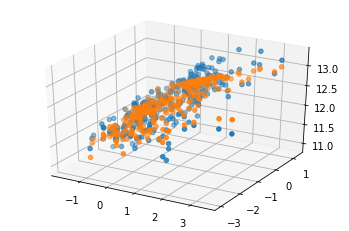

In [66]:
#3次元プロット
plot_results_3d(X_test_z[:, 0], X_test_z[:, 1], y_test, pred_lnr_reg)

## 【課題3】手法の比較
以下の全ての手法について学習・推定・評価・可視化を行ってください。そして、指標値を１つの表にまとめてください。その表と可視化した図を利用して結果を簡単に考察してください。どの手法がどの指標値が良かったかや、どういった図になっていたかを述べてください。

線形回帰
SVM
決定木
ランダムフォレスト
公式ドキュメントへのリンクは以下です。本来はそれぞれパラメータをチューニングするべきですが、まずはデフォルトで実行しましょう。

sklearn.linear_model.LinearRegression — scikit-learn 0.20.2 documentation
sklearn.svm.SVR — scikit-learn 0.20.2 documentation
sklearn.tree.DecisionTreeRegressor — scikit-learn 0.20.2 documentation
sklearn.ensemble.RandomForestRegressor — scikit-learn 0.20.2 documentation
SVM、決定木、ランダムフォレストは分類問題でも使用した手法ですが、回帰問題用のライブラリはそれぞれ専用のものに分かれています。

### 学習

In [33]:
#Linear Regression
from sklearn.linear_model import LinearRegression
reg_lnr = LinearRegression()
learned_model_lnr_reg = reg_lnr.fit(X_train_z, y_train)

#SVM Regression (SVR)
from sklearn.svm import SVR
reg_svr = SVR()
learned_model_svr_reg = reg_svr.fit(X_train_z, y_train)

#決定木
from sklearn.tree import DecisionTreeRegressor
reg_dt = DecisionTreeRegressor()
learned_model_dt_reg = reg_dt.fit(X_train_z, y_train)

#ランダムフォレスト
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
learned_model_rf_reg = reg_rf.fit(X_train_z, y_train)

/Users/ohmori/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


### 推定

In [34]:
def predict_test_and_calculate_score(model, X_test, y_test):
    pred = model.predict(X_test)
    score = model.score(X_test, y_test)
    return pred, score

#Linear Regression
pred_lnr_reg, score_lnr_reg = predict_test_and_calculate_score(learned_model_lnr_reg, X_test_z, y_test)

#SVM Regression (SVR)
pred_svr_reg, score_svr_reg = predict_test_and_calculate_score(learned_model_svr_reg, X_test_z, y_test)

#決定木
pred_dt_reg, score_dt_reg = predict_test_and_calculate_score(learned_model_dt_reg, X_test_z, y_test)

#ランダムフォレスト
pred_rf_reg, score_rf_reg = predict_test_and_calculate_score(learned_model_rf_reg, X_test_z, y_test)

### 評価

In [54]:
#決定係数r2

print("Coefficient of Determination(R2: 0.0-1.0)")
print("Linear Regression: %f" % score_lnr_reg)
print("SVR: %f" % score_svr_reg)
print("Decision Tree %f" % score_dt_reg)
print("Random Forest %f" % score_rf_reg)

Coefficient of Determination(R2: 0.0-1.0)
Linear Regression: 0.727750
SVR: 0.729411
Decision Tree 0.592469
Random Forest 0.699881


In [55]:
#calculate mean squared error

from sklearn.metrics import mean_squared_error

#Linear Regression
mse_lnr_reg = mean_squared_error(y_test, pred_lnr_reg)

#SVM Regression (SVR)
mse_svr_reg = mean_squared_error(y_test, pred_svr_reg)

#決定木
mse_dt_reg = mean_squared_error(y_test, pred_dt_reg)

#ランダムフォレスト
mse_rf_reg = mean_squared_error(y_test, pred_rf_reg)

print("Mean Squared Error")
print("Linear Regression: %f" % mse_lnr_reg)
print("SVR: %f" % mse_svr_reg)
print("Decision Tree %f" % mse_dt_reg)
print("Random Forest %f" % mse_rf_reg)

Mean Squared Error
Linear Regression: 0.040594
SVR: 0.040347
Decision Tree 0.060766
Random Forest 0.044750


### 可視化

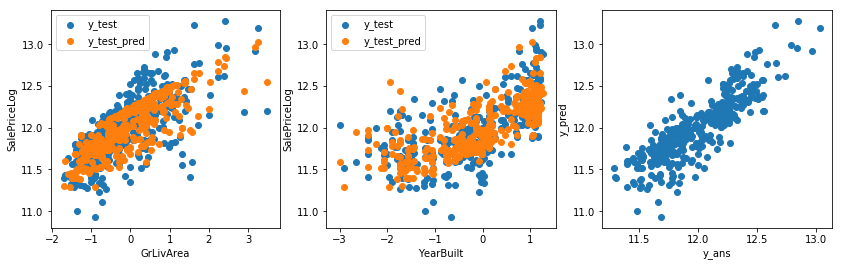

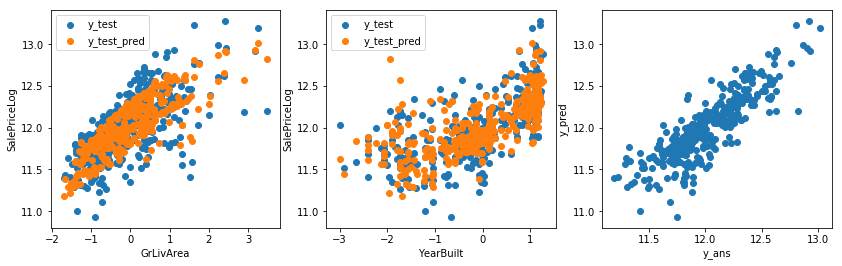

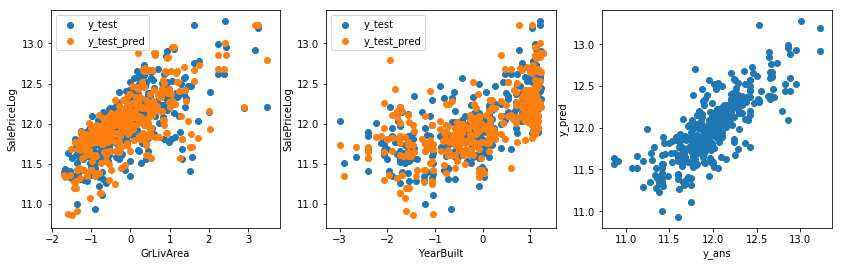

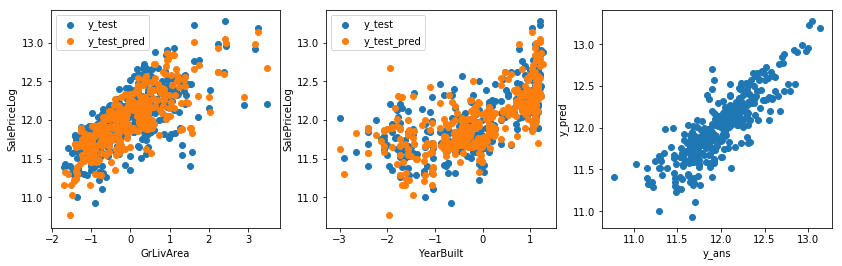

In [56]:
#Linear Regression
plot_results(X_test_z[:, 0], X_test_z[:, 1], y_test, pred_lnr_reg)

#SVR
plot_results(X_test_z[:, 0], X_test_z[:, 1], y_test, pred_svr_reg)

#Decision Tree
plot_results(X_test_z[:, 0], X_test_z[:, 1], y_test, pred_dt_reg)

#Random Forest
plot_results(X_test_z[:, 0], X_test_z[:, 1], y_test, pred_rf_reg)

Decision TreeとRandom ForestはLinear RegressionとSVRに比して当てはまりが悪い（R^2値が小さく、MSEが大きい）。2Dの散布図を見ると、GrLivAreaとYearBuiltそれぞれとSalePriceLogに対して散布図上の点はanswerとpredictedで近いように見える（Linear RegressionやSVRよりもよく予測できているように見える）。しかし評価値でLinear RegressionとSVRに劣るということは、3Dで考えた時に、GrLivAreaとYearBuiltがなす平面（平均）からの距離の総和に関してLinear RegressionとSVRの方が小さい（優れている）ということだろう。

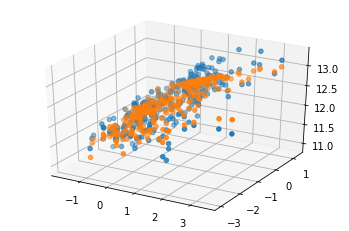

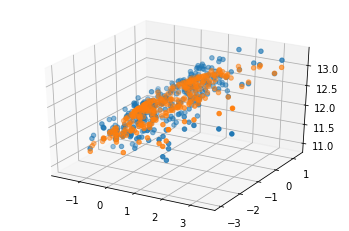

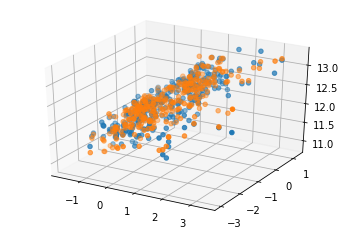

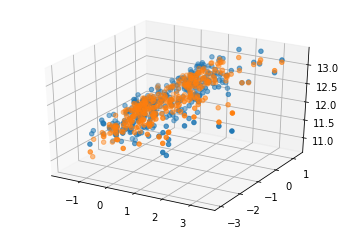

In [67]:
#Linear Regression
plot_results_3d(X_test_z[:, 0], X_test_z[:, 1], y_test, pred_lnr_reg)

#SVR
plot_results_3d(X_test_z[:, 0], X_test_z[:, 1], y_test, pred_svr_reg)

#Decision Tree
plot_results_3d(X_test_z[:, 0], X_test_z[:, 1], y_test, pred_dt_reg)

#Random Forest
plot_results_3d(X_test_z[:, 0], X_test_z[:, 1], y_test, pred_rf_reg)

## 【問題4】（アドバンス課題）各パラメータの意味
手法のパラメータはデフォルトとしましたが、実際に利用する上ではデフォルトは必ずしも良い設定ではありません。それぞれの意味を調査した上で複数の設定を試し、その結果を報告してください。

## 【問題5】（アドバンス課題）他の特徴量も使用しての学習
ここまでは練習のために2つの特徴量だけを使いましたが、他の特徴量を加えるとどのようになるか検証してください。どう選択・加工するかにはデータ分析が重要になってきます。

Kaggleのカーネルも参考にできます。

House Prices: Advanced Regression Techniques | Kaggle